In [1668]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [1670]:
df=pd.read_csv("final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [1672]:
df.head()

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000      0.069018  ...        1.242331      0.207055   
2  0.000000  0.000000      0.000000  ...        0.616438      0.924658   
3  0.028090  0.056180      0.224719  ...        0.000000      0.000000   
4  0.017889  0.017889      0.053667  ...        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   
3            6408           175             22      9       50000000   
4            5031           238             51     21       40000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0  

[5 rows x 22 columns]

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [1674]:
df.shape

(10754, 22)

In [1675]:
df.describe()

height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.442335   
min        0.000000             0.000000      0.000000        0.000000   
25%        0.053191             0.000000      0.000000        0.000000   
50%        0.150250             0.000000      0.000000        0.000000   
75%        0.248276             0.000000      0.000000        0.000000   
max       30.000000             1.000000      6.923077        9.000000   

       clean sheets  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean       0.044881     2470.789381    117.961689      15.826297   
std        0.924437     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%        0.000000      660.000000      0.000000       0.000000   
50%        0.000000     2101.500000     37.000000       5.000000   
75%        0.000000     3968.000000    181.000000      24.000000   
max       90.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [1676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### [[explanation of each column in your dataset:]]

##### player_id: A unique identifier for each player.
##### team: The team the player belongs to.
##### name: The name of the player.
##### position: The playing position of the player (e.g., forward, midfielder, defender).
##### height: The height of the player, likely in meters or centimeters, represented as a float.
##### age: The age of the player, an integer value.
##### appearance: The number of appearances or matches the player has played.
##### goals: The total number of goals the player has scored.
##### assists: The total number of assists provided by the player.
##### yellow cards: The number of yellow cards the player has received.
##### second yellow cards: The number of second yellow cards leading to expulsion (red card).
##### red cards: The total number of red cards received by the player.
##### goals conceded: The number of goals the player has allowed (likely for goalkeepers or defenders).
##### clean sheets: The number of games where the player (usually a goalkeeper or defender) did not allow any goals.
##### minutes played: Total minutes the player has spent on the field in matches.
##### days_injured: Total number of days the player has been injured.
##### games_injured: Total number of games the player missed due to injury.
##### award: Number of awards or distinctions the player has received.
##### current_value: The current market value of the player (likely in a specific currency, such as euros or dollars).
##### highest_value: The highest market value the player has achieved in their career.
##### position_encoded: A numerical encoding of the player's position for analysis or modeling.
##### winger: A binary or categorical variable indicating whether the player is a winger or not (likely coded as 1 for "Yes" and 0 for "No").

## Preprocessing the Data

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

##### data source publish this data from  players competing in several top-tier global football leagues:
##### 11 European leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.
##### 4 American leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.
##### 1 African league, namely the DStv Premiership in South Africa.
##### 4 Asian leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

##### data is not up to date , it is in 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


##### data is consistent and has only one file 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [1686]:
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1688]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [1690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [1691]:
df.head(2)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   

     position  height   age  appearance  goals  assists  yellow cards  ...  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585  ...   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  

[2 rows x 22 columns]

##### 1. Change the player column into integer by spliting the column and extract only the id number
##### then check its uniqueness and change it to int datatype 
##### then rename the column to player_id

In [1693]:
df['player']=df['player'].str.split("/").apply(lambda x : x[4] if len(x) >=4 else  None)

In [1694]:
df['player'].nunique()

10754

In [1695]:
df['player'].duplicated().sum()

0

In [1696]:
df['player']=df['player'].astype(int)

In [1697]:
df['player'].dtypes

dtype('int32')

In [1698]:
df.rename(columns={"player":"player_id"},inplace =True)

In [1699]:
df

player_id                      team                name  \
0          59377         Manchester United        David de Gea   
1         128899         Manchester United        Jack Butland   
2          34130         Manchester United          Tom Heaton   
3         480762         Manchester United   Lisandro Martínez   
4         164770         Manchester United      Raphaël Varane   
...          ...                       ...                 ...   
10749     867763  Western Sydney Wanderers       Aidan Simmons   
10750     708099  Western Sydney Wanderers        Kusini Yengi   
10751    1023268  Western Sydney Wanderers     Nathanael Blair   
10752     703657  Western Sydney Wanderers    Zachary Sapsford   
10753     957230  Western Sydney Wanderers  Alexander Badolato   

                    position      height   age  appearance     goals  \
0                 Goalkeeper  189.000000  32.0         104  0.000000   
1                 Goalkeeper  196.000000  30.0          15  0.000000   
2                 Goalkeeper  188.000000  37.0           4  0.000000   
3       Defender Centre-Back  175.000000  25.0          82  0.028090   
4       Defender Centre-Back  191.000000  30.0          63  0.017889   
...                      ...         ...   ...         ...       ...   
10749     Attack-RightWinger  181.240353  20.0          16  0.175953   
10750  Attack Centre-Forward  190.000000  24.0          26  0.372671   
10751  Attack Centre-Forward  181.240353  19.0          20  0.375000   
10752  Attack Centre-Forward  181.240353  20.0          17  0.312139   
10753  Attack Centre-Forward  170.000000  18.0          21  0.000000   

        assists  yellow cards  ...  goals conceded  clean sheets  \
0      0.000000      0.009585  ...        1.217252      0.335463   
1      0.000000      0.069018  ...        1.242331      0.207055   
2      0.000000      0.000000  ...        0.616438      0.924658   
3      0.056180      0.224719  ...        0.000000      0.000000   
4      0.017889      0.053667  ...        0.000000      0.000000   
...         ...           ...  ...             ...           ...   
10749  0.087977      0.263930  ...        0.000000      0.000000   
10750  0.186335      0.186335  ...        0.000000      0.000000   
10751  0.000000      0.187500  ...        0.000000      0.000000   
10752  0.104046      0.000000  ...        0.000000      0.000000   
10753  0.000000      0.086042  ...        0.000000      0.000000   

       minutes played  days_injured  games_injured  award  current_value  \
0                9390            42              5     13       15000000   
1                1304           510             58      1        1500000   
2                 292           697             84      4         600000   
3                6408           175             22      9       50000000   
4                5031           238             51     21       40000000   
...               ...           ...            ...    ...            ...   
10749            1023             0              0      0          75000   
10750            1449           102             18      0         300000   
10751             960             0              0      0          50000   
10752             865             0              0      0          50000   
10753            1046             0              0      0          25000   

       highest_value  position_encoded  winger  
0           70000000                 1       0  
1           22000000                 1       0  
2            6000000                 1       0  
3           50000000                 2       0  
4           80000000                 2       0  
...              ...               ...     ...  
10749          75000                 4       1  
10750         300000                 4       0  
10751          50000                 4       0  
10752          50000                 4       0  
10753          25000                 4       0  

[10754 rows x 22 columns]

In [1700]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [1701]:
df['name'].value_counts()

name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64

In [1702]:
df['height']=df['height'].round(2)

In [1703]:
df['age']=df['age'].astype(int)

In [1704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [1705]:
df.head(6)

player_id               team               name              position  \
0      59377  Manchester United       David de Gea            Goalkeeper   
1     128899  Manchester United       Jack Butland            Goalkeeper   
2      34130  Manchester United         Tom Heaton            Goalkeeper   
3     480762  Manchester United  Lisandro Martínez  Defender Centre-Back   
4     164770  Manchester United     Raphaël Varane  Defender Centre-Back   
5     177907  Manchester United      Harry Maguire  Defender Centre-Back   

   height  age  appearance     goals   assists  yellow cards  ...  \
0   189.0   32         104  0.000000  0.000000      0.009585  ...   
1   196.0   30          15  0.000000  0.000000      0.069018  ...   
2   188.0   37           4  0.000000  0.000000      0.000000  ...   
3   175.0   25          82  0.028090  0.056180      0.224719  ...   
4   191.0   30          63  0.017889  0.017889      0.053667  ...   
5   194.0   30          68  0.037799  0.000000      0.302394  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   
2        0.616438      0.924658             292           697             84   
3        0.000000      0.000000            6408           175             22   
4        0.000000      0.000000            5031           238             51   
5        0.000000      0.000000            4762           148             27   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  
2      4         600000        6000000                 1       0  
3      9       50000000       50000000                 2       0  
4     21       40000000       80000000                 2       0  
5      1       25000000       70000000                 2       0  

[6 rows x 22 columns]

In [1706]:
df['goals']=df['goals'].astype(int)

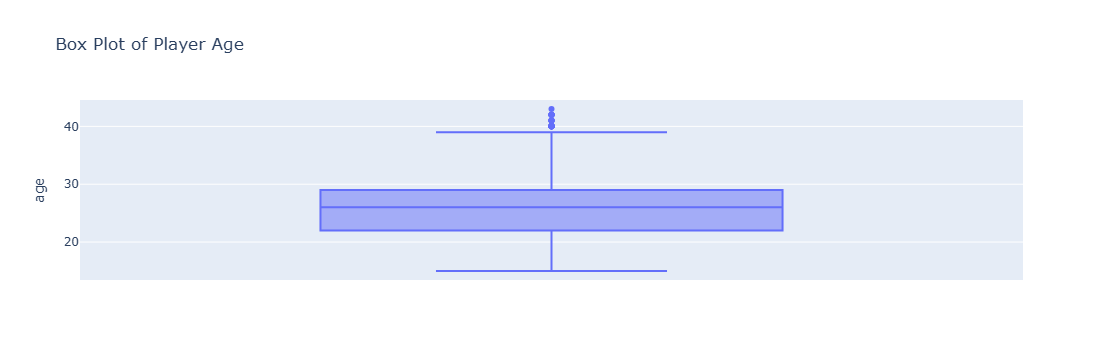

In [1707]:
# check outliers
fig = px.box(df, y='age', title="Box Plot of Player Age")

# Show the plot
fig.show() # I will consider 40 as outlier

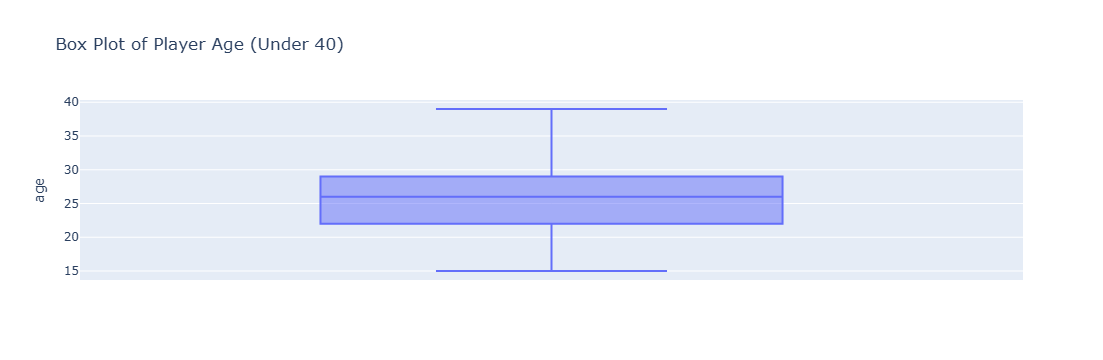

In [1708]:
df_filtered = df[df['age'] < 40]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='age', title="Box Plot of Player Age (Under 40)")

# Show the plot
fig.show()

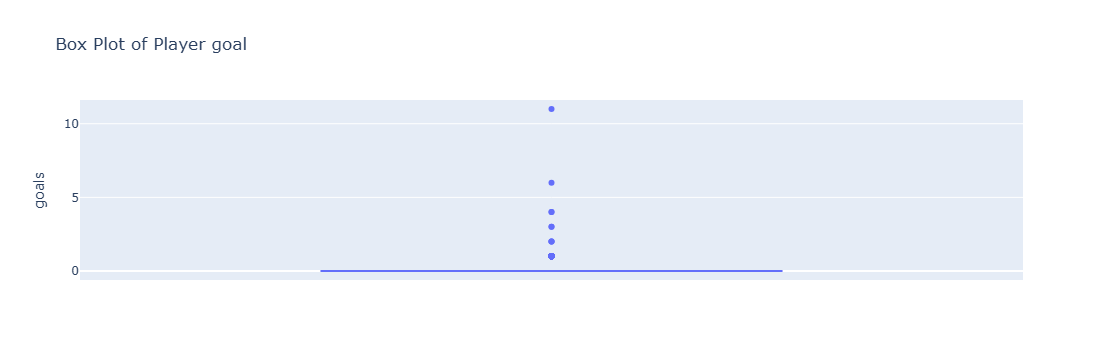

In [1709]:
# check outliers
fig = px.box(df, y='goals', title="Box Plot of Player goal")

# Show the plot
fig.show() 

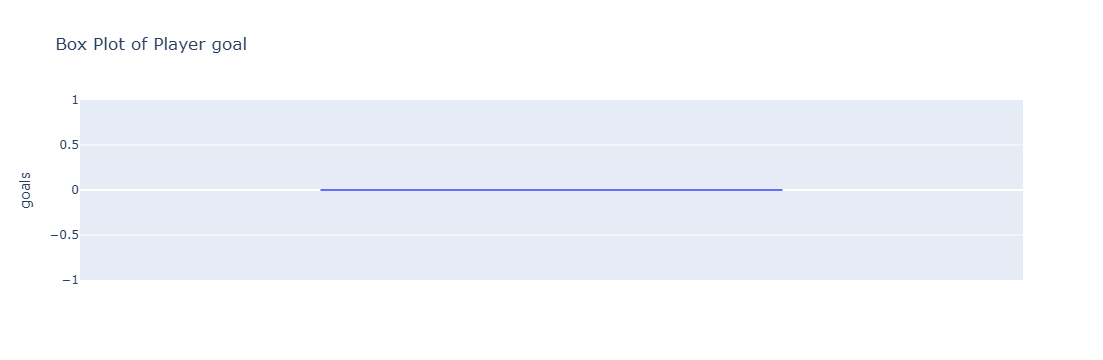

In [1710]:
df_filtered = df[df['goals'] <1]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='goals', title="Box Plot of Player goal ")

# Show the plot
fig.show()

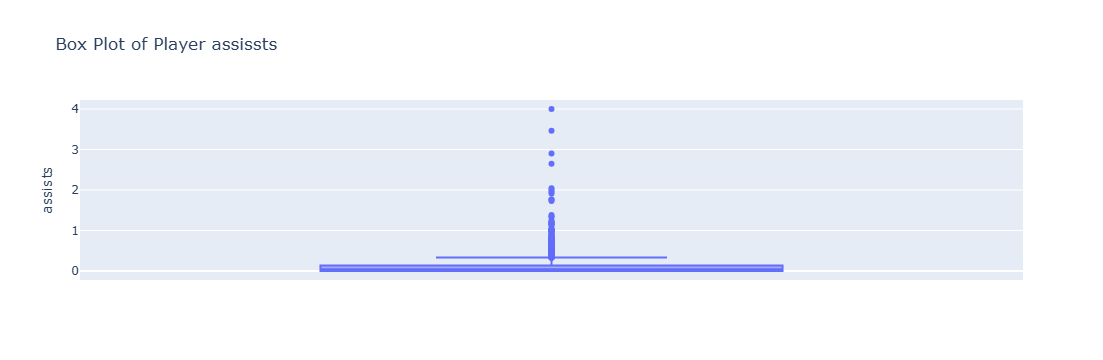

In [1711]:
# check outliers
fig = px.box(df, y='assists', title="Box Plot of Player assissts")

# Show the plot
fig.show() 

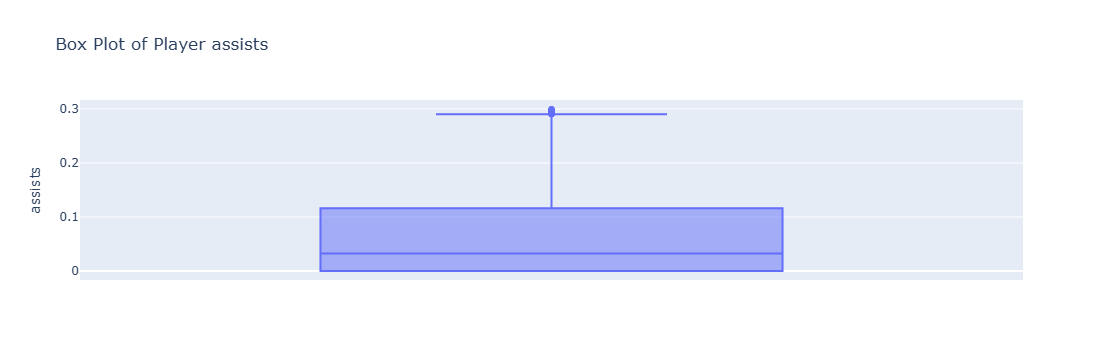

In [1712]:
df_filtered = df[df['assists'] <.3]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='assists', title="Box Plot of Player assists ")

# Show the plot
fig.show()

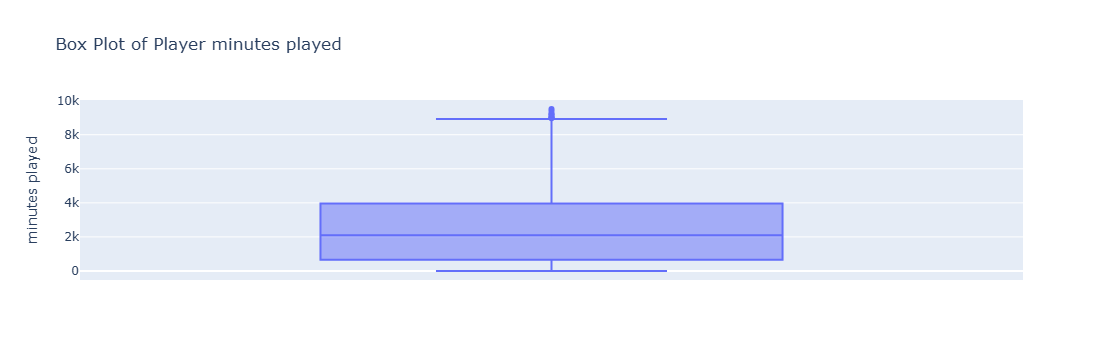

In [1713]:
# check outliers
fig = px.box(df, y='minutes played', title="Box Plot of Player minutes played")

# Show the plot
fig.show() 

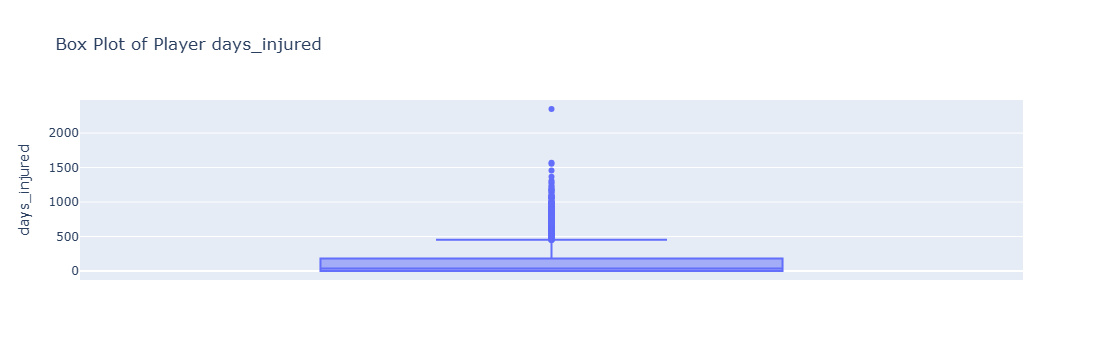

In [1714]:
# check outliers
fig = px.box(df, y='days_injured', title="Box Plot of Player days_injured")

# Show the plot
fig.show() 

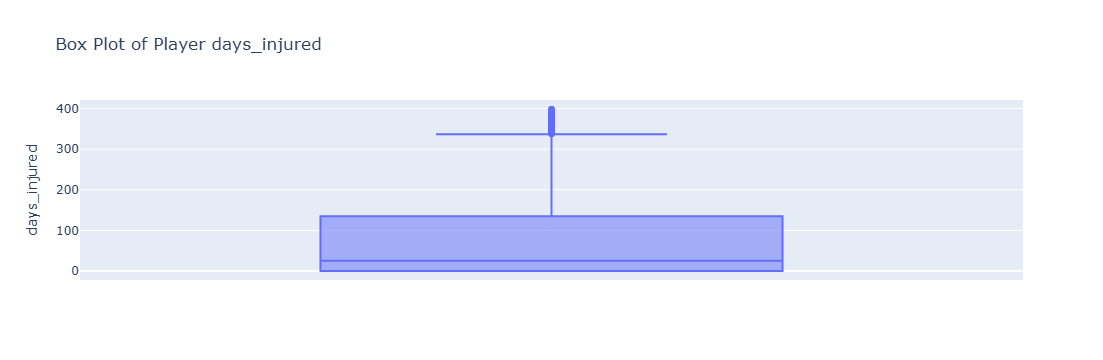

In [1715]:
df_filtered = df[df['days_injured'] <400]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='days_injured', title="Box Plot of Player days_injured ")

# Show the plot
fig.show()

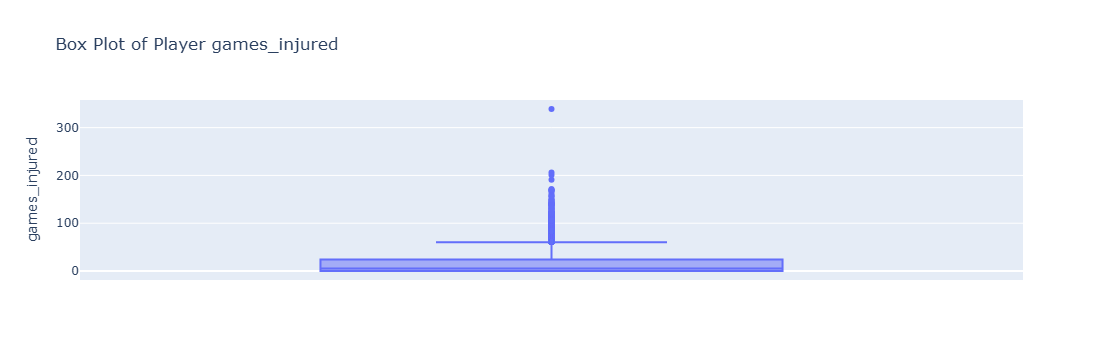

In [1716]:
# check outliers
fig = px.box(df, y='games_injured', title="Box Plot of Player games_injured")

# Show the plot
fig.show() 

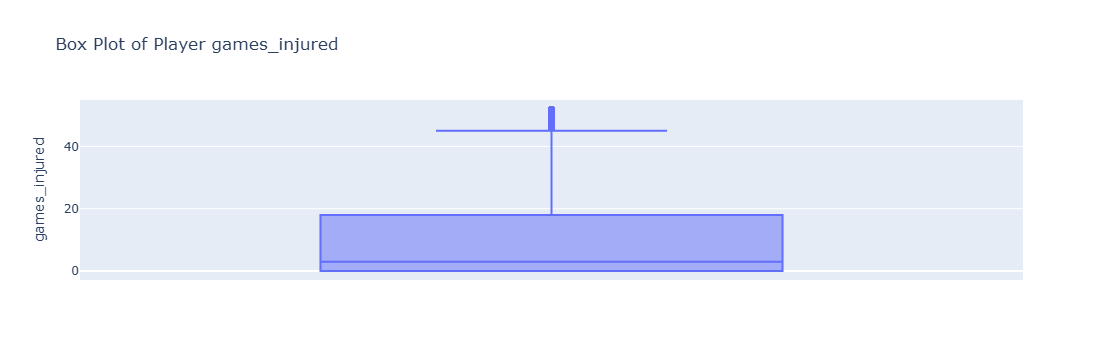

In [1717]:
df_filtered = df[df['games_injured'] <53]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='games_injured', title="Box Plot of Player games_injured ")

# Show the plot
fig.show()

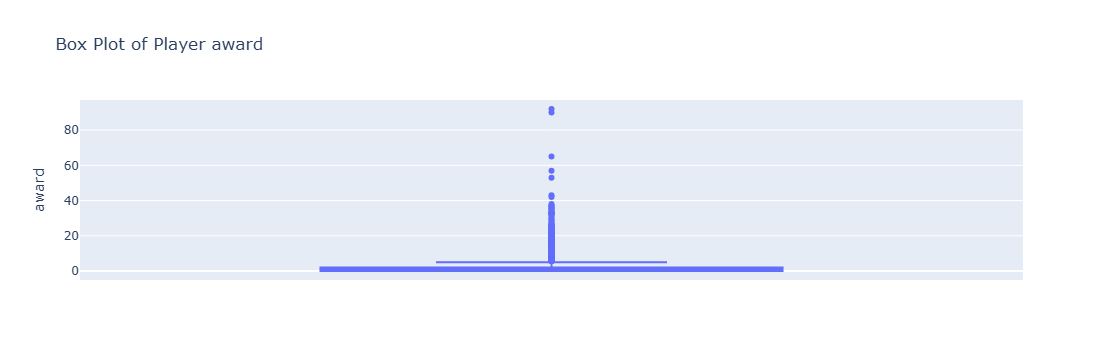

In [1718]:
# check outliers
fig = px.box(df, y='award', title="Box Plot of Player award")

# Show the plot
fig.show() 

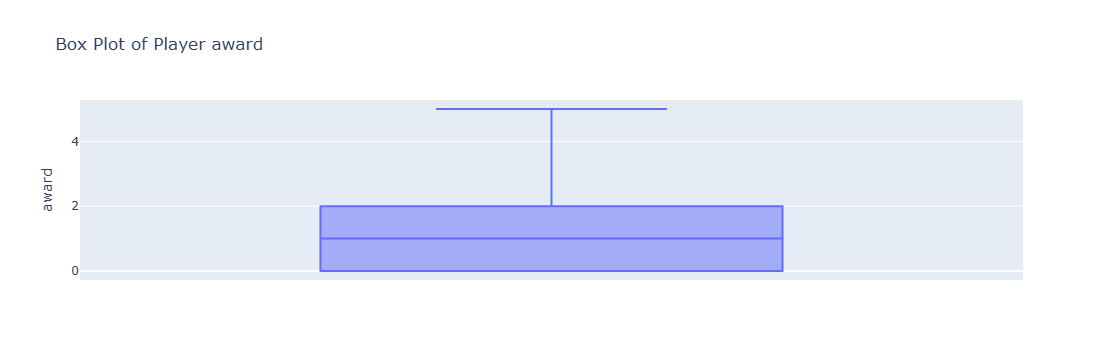

In [1719]:
df_filtered = df[df['award'] <6]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='award', title="Box Plot of Player award ")

# Show the plot
fig.show()

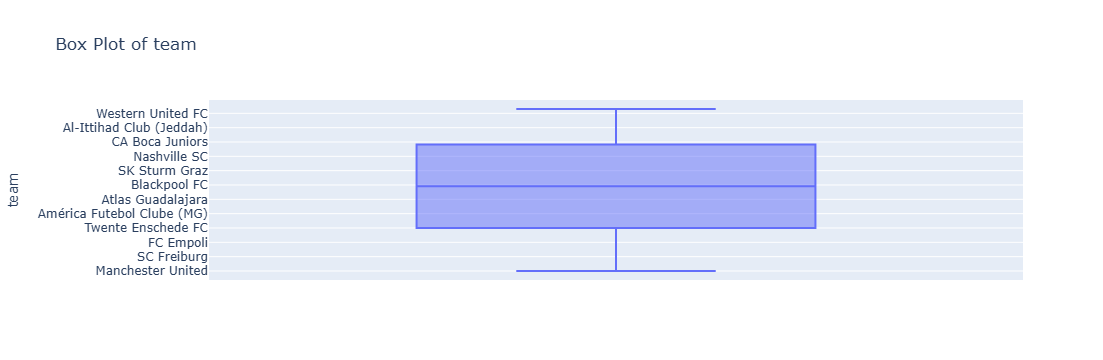

In [1720]:
# check outliers
fig = px.box(df, y='team', title="Box Plot of team")

# Show the plot
fig.show() 

# Logistic Regression

### Predicting Current Player Value (current_value)
#### Dependent Variable: current_value
#### Independent Variables: age, goals, assists, minutes played, days_injured, games_injured, award, team

##### 1. Before we start feeding the model with data , we want to check the selected independent features correlations, and ommit any feature that is highly correlated to another one 

In [1724]:
df_filtered.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [1725]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9720 entries, 1 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            9720 non-null   int32  
 1   team                 9720 non-null   object 
 2   name                 9720 non-null   object 
 3   position             9720 non-null   object 
 4   height               9720 non-null   float64
 5   age                  9720 non-null   int32  
 6   appearance           9720 non-null   int64  
 7   goals                9720 non-null   int32  
 8   assists              9720 non-null   float64
 9   yellow cards         9720 non-null   float64
 10  second yellow cards  9720 non-null   float64
 11  red cards            9720 non-null   float64
 12  goals conceded       9720 non-null   float64
 13  clean sheets         9720 non-null   float64
 14  minutes played       9720 non-null   int64  
 15  days_injured         9720 non-null   int64

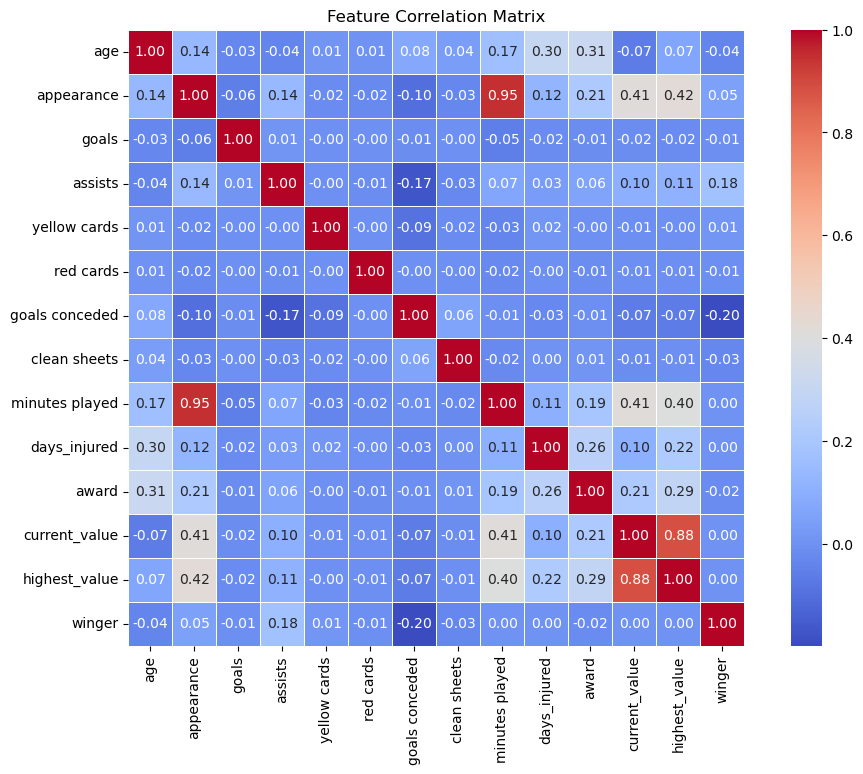

In [1726]:
# check correlation betweeen the feature 

# Define the independent variables
independent_vars = [ 'age', 'appearance',
       'goals', 'assists', 'yellow cards',  'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'award', 'current_value', 'highest_value',
        'winger']

# Calculate the correlation matrix
corr_matrix = df_filtered[independent_vars].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()



In [1727]:
df_filtered['current_value'].describe()

count    9.720000e+03
mean     2.905247e+06
std      6.844459e+06
min      0.000000e+00
25%      2.500000e+05
50%      7.000000e+05
75%      2.500000e+06
max      1.200000e+08
Name: current_value, dtype: float64

In [1728]:
df_filtered['current_value'].value_counts()

current_value
1000000     441
300000      429
500000      414
50000       414
1500000     388
           ... 
90000000      1
5800000       1
4300000       1
26000000      1
4400000       1
Name: count, Length: 121, dtype: int64

In [1729]:
df_filtered['current_value'].max()

120000000

In [1730]:
df_filtered['current_value'].median()

700000.0

##### game_injured is highly correlated with days_injured so we will take only one of them 
##### we should considered highe

In [1732]:
df_filtered.head()

player_id               team           name              position  height  \
1     128899  Manchester United   Jack Butland            Goalkeeper   196.0   
2      34130  Manchester United     Tom Heaton            Goalkeeper   188.0   
5     177907  Manchester United  Harry Maguire  Defender Centre-Back   194.0   
8     548470  Manchester United    Teden Mengi  Defender Centre-Back   186.0   
9     183288  Manchester United      Luke Shaw    Defender Left-Back   178.0   

   age  appearance  goals   assists  yellow cards  ...  goals conceded  \
1   30          15      0  0.000000      0.069018  ...        1.242331   
2   37           4      0  0.000000      0.000000  ...        0.616438   
5   30          68      0  0.000000      0.302394  ...        0.000000   
8   21          34      0  0.000000      0.130529  ...        0.000000   
9   27          74      0  0.169115      0.353604  ...        0.000000   

   clean sheets  minutes played  days_injured  games_injured  award  \
1      0.207055            1304           510             58      1   
2      0.924658             292           697             84      4   
5      0.000000            4762           148             27      1   
8      0.000000            2758            47             13      0   
9      0.000000            5854           443             70      4   

   current_value  highest_value  position_encoded  winger  
1        1500000       22000000                 1       0  
2         600000        6000000                 1       0  
5       25000000       70000000                 2       0  
8        2000000        2000000                 2       0  
9       35000000       42000000                 2       1  

[5 rows x 22 columns]

In [1733]:
df_filtered.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

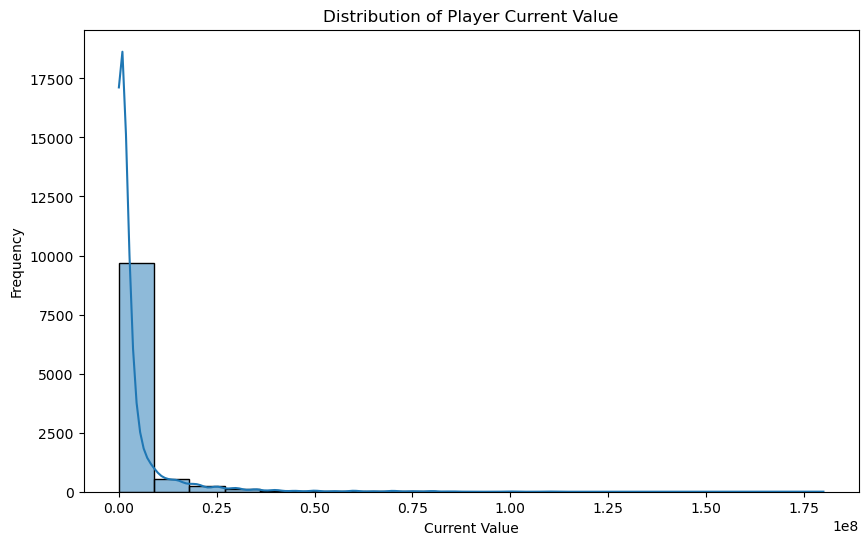

In [1734]:
plt.figure(figsize=(10, 6))
sns.histplot(df['current_value'], bins=20, kde=True)
plt.title('Distribution of Player Current Value')
plt.xlabel('Current Value')
plt.ylabel('Frequency')
plt.show()

##### 2. To find the most meaningful labels for the new price_range column, it’s essential to look at the data distribution and choose label boundaries that better represent the spread of current_value column.

###### I have  Used Quantiles , it allow me to divide the data into equal portions. 

In [1736]:


df_filtered=df_filtered.copy()

# Divide current_value into three quantile-based categories
df_filtered['price_range'] = pd.qcut(df_filtered['current_value'], q=3, labels=['Cheap', 'Moderate', 'High'])



y = df_filtered['price_range']

# Define the independent variables (X) again before scaling
X = df_filtered[['height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value',
       'position_encoded', 'winger']]




In [1737]:
#check the new column unique values 
df_filtered['price_range'].value_counts()

price_range
Cheap       3569
High        3100
Moderate    3051
Name: count, dtype: int64

In [1738]:
from sklearn.preprocessing import LabelEncoder
# encode the label to 0 and 1 and 2 because we have three classes
encoder = LabelEncoder()
df_filtered['price_range']= encoder.fit_transform(df_filtered['price_range'])  

In [1739]:
# in class 0 we have 3569 observations , in class 1 there is 3100 observations , in class 2 there is 3051 observations
# classes are distributed almost evently
df_filtered['price_range'].value_counts()

price_range
0    3569
1    3100
2    3051
Name: count, dtype: int64

In [1740]:
df_filtered.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger', 'price_range'],
      dtype='object')

In [1741]:
# drop id and the  target column 
df_filtered.drop(columns=['current_value','player_id'], inplace=True)


###  Feature selection


In [1743]:
#print the correlations of price range with other columns , Appearance and minutes played looks have the highest ones 
correlation = df_filtered.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['price_range'].sort_values(ascending=False))

price_range            1.000000
appearance             0.259517
minutes played         0.244252
award                  0.149221
games_injured          0.136191
days_injured           0.126917
age                    0.123122
position_encoded       0.095988
assists                0.088274
highest_value          0.084889
winger                 0.044328
yellow cards           0.033719
red cards              0.005644
second yellow cards    0.004734
goals                 -0.024667
clean sheets          -0.027411
height                -0.030583
goals conceded        -0.095391
Name: price_range, dtype: float64


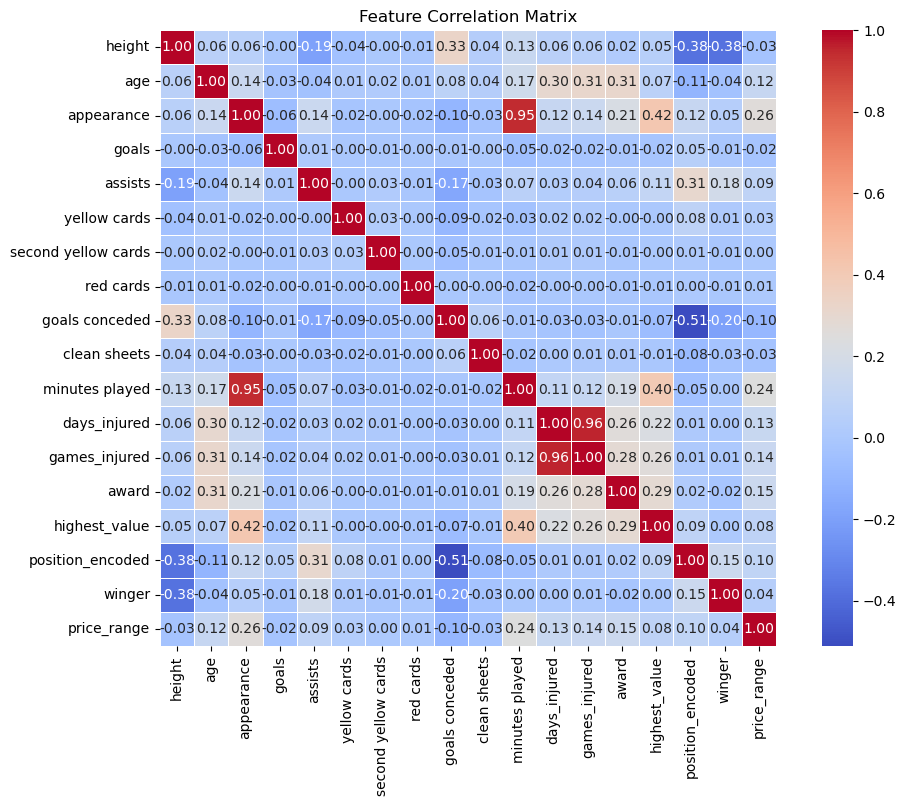

In [1744]:


# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [1745]:
# Set the correlation threshold
threshold = 0.02 # Adjust this threshold as needed

# Filter features with strong correlation with 'price_range_encoded'
selected_features = correlation[abs(correlation['price_range']) > threshold]['price_range'].index
selected_features

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value', 'position_encoded', 'winger',
       'price_range'],
      dtype='object')


##### We will ommit ['appearance'] because it already has relatiionship with the minutes played ,also ommit ['game injured'] that has also relation to days_injured , also , ommit  price range which is the encoded target and ommit position encoded 

In [1747]:
selected_features=['age', 'appearance', 'goals', 'assists', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 
       'award', 'highest_value', 'winger']

In [1748]:
df_filtered.head()

team           name              position  height  age  \
1  Manchester United   Jack Butland            Goalkeeper   196.0   30   
2  Manchester United     Tom Heaton            Goalkeeper   188.0   37   
5  Manchester United  Harry Maguire  Defender Centre-Back   194.0   30   
8  Manchester United    Teden Mengi  Defender Centre-Back   186.0   21   
9  Manchester United      Luke Shaw    Defender Left-Back   178.0   27   

   appearance  goals   assists  yellow cards  second yellow cards  ...  \
1          15      0  0.000000      0.069018               0.0000  ...   
2           4      0  0.000000      0.000000               0.0000  ...   
5          68      0  0.000000      0.302394               0.0189  ...   
8          34      0  0.000000      0.130529               0.0000  ...   
9          74      0  0.169115      0.353604               0.0000  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
1        1.242331      0.207055            1304           510             58   
2        0.616438      0.924658             292           697             84   
5        0.000000      0.000000            4762           148             27   
8        0.000000      0.000000            2758            47             13   
9        0.000000      0.000000            5854           443             70   

   award  highest_value  position_encoded  winger  price_range  
1      1       22000000                 1       0            2  
2      4        6000000                 1       0            2  
5      1       70000000                 2       0            1  
8      0        2000000                 2       0            1  
9      4       42000000                 2       1            1  

[5 rows x 21 columns]

##### 3. Clearly define X and Y to the model

In [1750]:

x = df_filtered[selected_features]
x.head()
y=df_filtered['price_range']

In [1751]:

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training independent variables and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)
# Print shapes
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")
print(f"Scaled training features shape: {y_train.shape}")
print(f"Scaled testing features shape: {y_test.shape}")


Scaled training features shape: (7776, 16)
Scaled testing features shape: (1944, 16)
Scaled training features shape: (7776,)
Scaled testing features shape: (1944,)


##### 4. Start Logistic regression model using fit object in regression class

In [1753]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [1754]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display confusion matrix for more details on performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7196502057613169
Confusion Matrix:
 [[633   7  75]
 [  4 479 149]
 [257  53 287]]


##### 1. Accuracy (71.97%)
##### The accuracy of 71.97% indicates that the model correctly classifies approximately 72% of the instances. This is a reasonable score but may suggest room for improvement, especially in light of class imbalances or misclassifications seen in the confusion matrix.
##### _________________________________________________________________________________
##### 2. Confusion Matrix Analysis
##### The matrix reveals how well each class is being predicted:
##### Class 0 (Cheap): Out of all Cheap instances, 633 were correctly classified. However, 75 instances were misclassified as High, which could imply some overlap in features between Cheap and High categories.
##### Class 1 (Middle): This class performed fairly well, with 479 correct predictions. However, 149 instances were misclassified as High, and a small number (4) as Cheap. This could indicate that the High class features overlap significantly with those of Middle.
##### Class 2 (High): This class is the most challenging for the model, with only 287 correctly classified instances. 257 were misclassified as Cheap and 53 as Middle, suggesting that players in High value may share characteristics with those in lower categories.


In [1756]:
# Each row of the model.coef_ matrix tells  how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

Coefficient
height              -0.044704
age                  0.245872
appearance          -0.024078
goals                0.009892
assists             -0.004016
yellow cards         0.012924
red cards            0.022989
goals conceded       0.057655
clean sheets        -0.056333
minutes played       0.068207
days_injured        -0.041037
games_injured        0.117033
award                0.033930
highest_value        1.012051
position_encoded     0.049112
winger              -0.001252

##### Highest value was the feature that is more affecting the model in selecting in which calss specific observation might be 
##### which was obious from the correlation matrix 

In [1758]:
model.coef_


array([[ 1.84292992e-02,  4.22015086e-01,  1.99385682e-01,
         4.78744992e-03, -5.69186159e-02, -4.30311324e-02,
        -3.70744135e-02,  1.39912613e-01,  1.99216943e-02,
        -7.94701132e-01,  3.63667783e-02,  2.19385519e-03,
        -1.26050444e-01, -6.70714103e+00, -9.72063084e-02,
        -2.86627003e-02],
       [ 2.62751298e-02, -6.67886736e-01, -1.75307602e-01,
        -1.46789608e-02,  6.09342561e-02,  3.01076191e-02,
         1.40853251e-02, -1.97567364e-01,  3.64112741e-02,
         7.26494573e-01,  4.66982527e-03, -1.19226439e-01,
         9.21202364e-02,  5.69509000e+00,  4.80940127e-02,
         2.99142169e-02],
       [-4.47044290e-02,  2.45871650e-01, -2.40780801e-02,
         9.89151091e-03, -4.01564021e-03,  1.29235133e-02,
         2.29890883e-02,  5.76547511e-02, -5.63329684e-02,
         6.82065587e-02, -4.10366036e-02,  1.17032583e-01,
         3.39302078e-02,  1.01205103e+00,  4.91122957e-02,
        -1.25151655e-03]])

In [1759]:
# check intercept ; In logistic regression, model.intercept_ represents the intercept (or bias term) of the model. 
#This value is added to the weighted sum of the features before applying the logistic function, which transforms the result into a probability.
print(model.intercept_) 


[-2.05856761  1.13403869  0.92452892]


##### -2.05856761: The intercept for the first class [cheap] suggests a negative bias, which means that without any influence from the features, the probability for this class is initially low.
##### 1.13403869: The intercept for the second class indicates a positive bias, meaning there’s a higher baseline probability for this class relative to the first [ Moderate ].
##### 0.92452892: The intercept for the third class also has a positive value, but it's smaller than the second class, so it starts with a moderate baseline probability. [ High]

In [1761]:
# our benchmark model
base_model = round(df_filtered['price_range'].value_counts()[1]/df_filtered.shape[0]*100, 2)
base_model


31.89

##### A baseline model typically provides a reference point for model performance. In this case, if you were to predict the Middle class for every entry, you would be correct 31.89% of the time.

In [1763]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.727880658436214

##### our model achieved an accuracy of 72.79% on the training set. 

In [1765]:
# Evaluate our model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7196502057613169

##### 71.97% accuracy implies that our model correctly predicts the price_range class for about 72% of instances in the test set.
##### Given the baseline, this level of accuracy suggests that our logistic regression model is reasonably good at generalizing, although further improvement might still be possible.

##### The training accuracy (72.79%) is close to the test accuracy (71.97%), indicating that the model generalizes well to new data. This similarity suggests the model is not overfitting, as it performs almost equally well on both sets.
##### Both training and test accuracies being above the baseline (31.89%) indicates that the model is capturing meaningful relationships in the data, distinguishing between the price_range categories effectively.

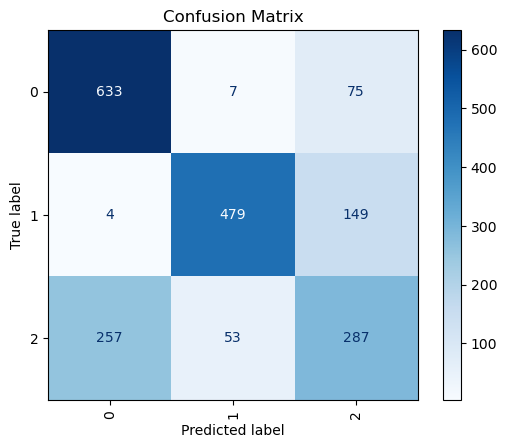

In [1768]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [1769]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.72


##### The precision score of (72%) indicates that, on average, 72% of the instances that the model predicted as a given class (e.g., Cheap, Middle, or High) were actually correct.
##### Precision measures the accuracy of positive predictions for each class.

In [1771]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.71


##### The recall score of (71%) indicates that, on average, the model correctly identifies 71% of the actual instances of each class (Cheap, Middle, or High).
##### Recall measures the proportion of actual positives (instances in each class) that the model correctly identified.


In [1773]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.71


##### The F1 score of (71%) provides a balanced measure of our model's performance by considering both precision and recall.
##### The F1 score is the harmonic mean of precision and recall. It combines both metrics into a single score that reflects the model’s ability to balance false positives and false negatives.

In [1775]:
y_pred_proba = model.predict_proba(X_test_scaled)


In [1776]:
# Check the shape
print(y_pred_proba.shape)  # Should be (n_samples, n_classes)

(1944, 3)


In [1777]:
# Check shapes again before calculating AUC
print(X_train_scaled.shape[0], y_test.shape[0])  # Should be the same
print(y_pred_proba.shape)  # Should be (n_samples, n_classes)

7776 1944
(1944, 3)


In [1778]:
# Calculate the ROC-AUC score using the OvR strategy | one ovr rest 
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC Score (OvR): {roc_auc:.2f}")

ROC-AUC Score (OvR): 0.88


##### A ROC-AUC score of 0.88 indicates that our model has a good level of predictive performance in distinguishing between the classes in your dataset.
##### A ROC-AUC score of 0.88 is promising and indicates a strong classification model. Following up with further analysis and adjustments can help you leverage this score for practical applications effectively. 

#### Plotting ROC Curves for Each Class


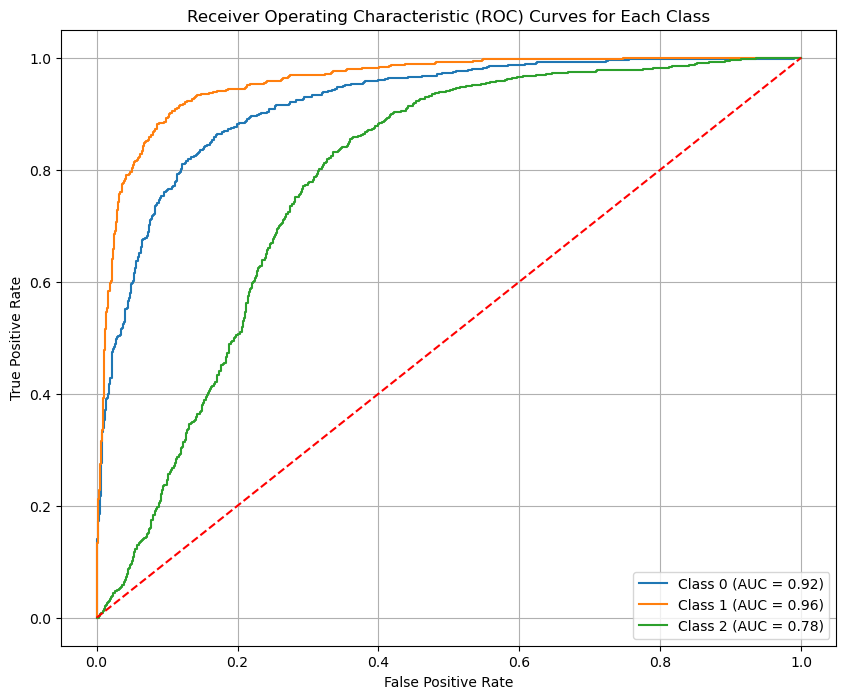

In [1781]:
# Plot ROC curves for each class
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
for i in range(y_pred_proba.shape[1]):  # Iterate over each class
    fpr, tpr, thresholds = roc_curve(y_test == i, y_pred_proba[:, i])  # True binary labels for class i
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test == i, y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for no discrimination
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

##### ROC Curve: The Receiver Operating Characteristic (ROC) curve is a graphical representation of a model's performance across different thresholds. It plots the True Positive Rate (TPR, or Recall) against the False Positive Rate (FPR) at various threshold settings.

##### ___________________________________________________________________________________________

##### AUC Score: The Area Under the Curve (AUC) provides a single scalar value to assess the performance of the model:

##### AUC = 0.5: This means the model is no better than random guessing.
##### AUC < 0.7: Indicates a poor model.
##### AUC between 0.7 and 0.8: Indicates a fair model.
##### AUC between 0.8 and 0.9: Indicates a good model.
##### AUC > 0.9: Indicates an excellent model.

### Interpretation of Class-Specific AUC Scores
##### Class 0 AUC = 0.92:

##### This indicates that the model has a very good ability to distinguish between Class 0 and the other classes. An AUC of 0.92 suggests that there’s a high probability that a randomly chosen instance from Class 0 will be ranked higher than a randomly chosen instance from any other class.
##### ___________________________________________________________________________________________________

##### Class 1 AUC = 0.96:

##### This score is even higher than Class 0, reflecting an excellent model performance in distinguishing Class 1 from the other classes. An AUC of 0.96 indicates that there’s a 96% chance that a randomly selected instance from Class 1 will be ranked higher than a randomly selected instance from other classes.

##### ___________________________________________________________________________________________________

##### Class 3 AUC = 0.78:

##### While this score is still acceptable, it is lower than the other two classes, suggesting that the model has moderate performance in distinguishing Class 3 from the others. An AUC of 0.78 indicates that there is a 78% chance of correctly ranking instances from Class 3 above instances from other classes. This suggests that the model might need some improvement when it comes to Class 3.

#### Conclusion 
#####  Logistic regression is a linear model and may struggle with complex boundaries between classes. Experimenting with non-linear models such as:

##### Random Forests
##### Gradient Boosting Machines
##### Support Vector Machines (SVM)
##### Neural Networks

##### might yield better performance, especially for the class that is currently underperforming.